找到一组使得小车可以上山的解，使用PSO算法寻找

In [19]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy
import math
from numba import jit

import mountain_car
import elitism
import time

# 粒子群算法
from sko.PSO import PSO
from sko.tools import set_run_mode
import matplotlib.pyplot as plt

# PSO Algorithm constants:
pop = 9600
max_iter = 40
w = 0.95
c1 = 0.5
c2 = 0.5

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the Zoo test class:
car = mountain_car.MountainCar(RANDOM_SEED)

def result2op(x):
    op = []
    for i in x:
        if i<0.5:
            op.append(0)
        elif i<1.5:
            op.append(1)
        else:
            op.append(2)
        
    return op


# fitness calculation
# @jit
def getCarScore(individual):
    individuals = result2op(individual)
    q_loss = 0
    # for i in range(len(individual)):
    #     q_loss+=math.pow(individual[i]-individuals[i],2)

    return car.getScore(individuals)+q_loss/200,  # return a tuple


In [20]:
# 多线程优化
mode = 'multiprocessing'
set_run_mode(getCarScore, mode)
pso = PSO(func=getCarScore, n_dim=200, pop=pop,
          max_iter=max_iter, lb=0, ub=2.49, w=w, c1=c1, c2=c2)

tt = time.time()
pso.run()
tt2 = time.time()


In [21]:
pso.gbest_x

array([2.49      , 2.49      , 1.79942739, 2.49      , 2.49      ,
       2.49      , 2.49      , 2.49      , 2.49      , 2.49      ,
       1.9373297 , 2.49      , 1.61887522, 0.        , 0.        ,
       2.49      , 2.49      , 2.49      , 0.        , 2.49      ,
       2.49      , 2.49      , 0.48447112, 2.49      , 2.49      ,
       0.        , 0.        , 0.        , 2.49      , 0.        ,
       2.49      , 0.        , 0.        , 2.49      , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04735237, 0.        , 0.        , 0.49788184,
       2.49      , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       2.49      , 0.        , 2.3439346 , 0.        , 2.49      ,
       0.        , 1.99606284, 1.51963966, 2.49      , 0.        ,
       2.49      , 2.49      , 0.        , 0.        , 0.        ,
       2.49      , 0.        , 2.49      , 2.49      , 0.     

In [22]:
# print best solution:
best =result2op(pso.gbest_x)
print()
print("Best Solution = ", best)
print("Best Fitness = ", pso.gbest_y)
print('Time used: {} sec'.format(tt2-tt))



Best Solution =  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0]
Best Fitness =  [-0.07]
Time used: 104.14297127723694 sec


In [23]:
# save best solution for a replay:
car.saveActions(best)
car.replay(best)

1 : --------------------------
action =  2
observation =  [-4.4479132e-01  4.1747934e-04]
distance from flag =  0.944791316986084

2 : --------------------------
action =  2
observation =  [-0.4439594   0.00083191]
distance from flag =  0.9439593851566315

3 : --------------------------
action =  2
observation =  [-0.4427191   0.00124029]
distance from flag =  0.9427191019058228

4 : --------------------------
action =  2
observation =  [-0.4410795   0.00163962]
distance from flag =  0.9410794973373413

5 : --------------------------
action =  2
observation =  [-0.43905246  0.00202703]
distance from flag =  0.9390524625778198

6 : --------------------------
action =  2
observation =  [-0.43665275  0.00239971]
distance from flag =  0.9366527497768402

7 : --------------------------
action =  2
observation =  [-0.43389776  0.00275498]
distance from flag =  0.9338977634906769

8 : --------------------------
action =  2
observation =  [-0.43080744  0.00309032]
distance from flag =  0.93080

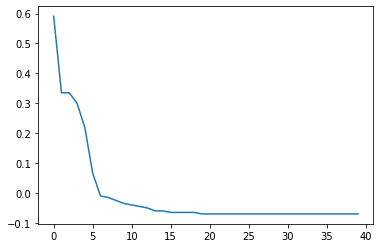

In [24]:
plt.plot(pso.gbest_y_hist)
plt.show()